# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [20]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [21]:
exec(open('init_notebook.py').read())

FileNotFoundError: [Errno 2] No such file or directory: 'init_notebook.py'

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import logging
logging.basicConfig(level=logging.INFO)
from extractors.loader import Loader

In [24]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

In [25]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
pedIds: 100%|██████████| 154/154 [00:21<00:00,  7.15it/s]
INFO:root:extracting crossing data for scene 11 from recording 18
pedIds: 100%|██████████| 122/122 [00:14<00:00,  8.64it/s]
INFO:root:extracting crossing data for scene 11 from recording 19
pedIds: 100%|██████████| 155/155 [00:21<00:00,  7.28it/s]
INFO:root:extracting crossing data for scene 11 from recording 20
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.14it/s]
INFO:root:extracting crossing data for scene 11 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.15it/s]
INFO:root:extracting crossing data for scene 20 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.19it/s]
INFO:root:extracting crossing data for scene 21 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.18it/s]
INFO:root:extracting crossing data for scene 22 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.17it/s]
I

In [26]:
crossingDf = loc2data.getCrossingDf()

# Saving and Loading pre--processed Location data

In [8]:
loc2data.saveCrossingDf("../data") # only crossing dataframe

In [9]:
loc2data.save("../data") # whole thing as a dill object

INFO:root:saved to ../data\location-2\all.dill


In [10]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2")

INFO:root:reading from ../data/location-2\all.dill


# Validate if there are trajectories not captured by the scene-based extractor

In [11]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [12]:
# visualizer.showLocationCrossingTracks(loc2data)

In [14]:
sceneData = loc2dataFromFile.getSceneCrossingData(10, 10, 5, refresh=False)
# sceneDf = loc2data.getSceneCrossingDf('10', 0, 0)

2022-09-27 15:47:29.951 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-27 15:47:29.970 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-27 15:47:29.971 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 227/227 [00:31<00:00,  7.10it/s]


2022-09-27 15:48:07.112 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


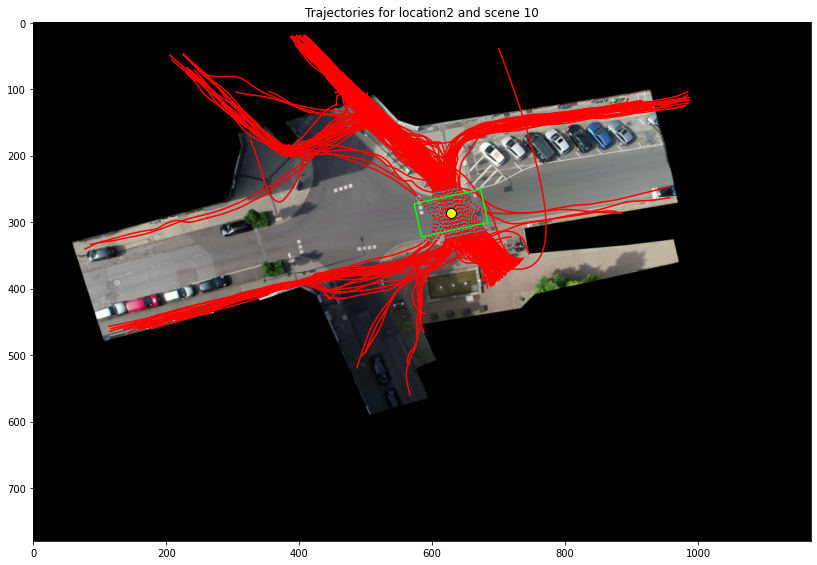

In [15]:
visualizer.showLocationSceneData(sceneData)

2022-09-27 15:48:25.086 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-27 15:48:25.088 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-27 15:48:25.088 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 5/5 [00:00<00:00, 15.59it/s]
2022-09-27 15:48:25.508 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


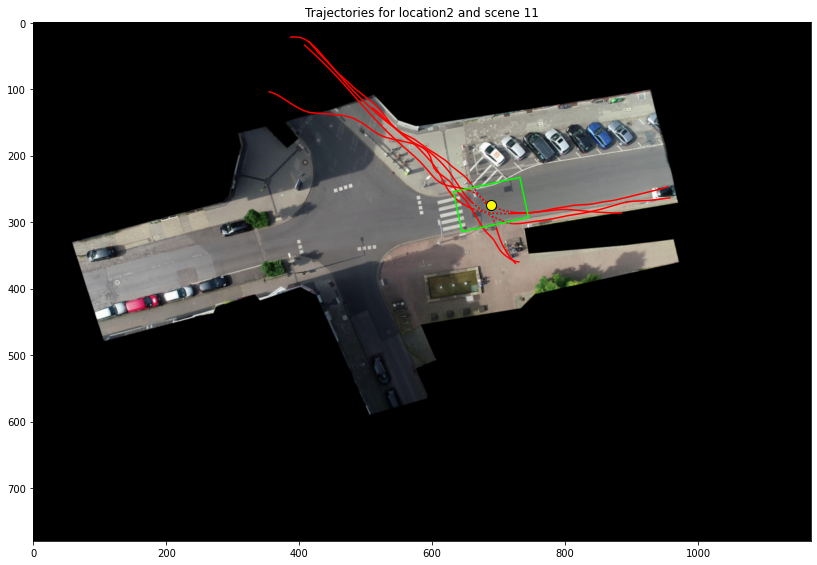

In [16]:
scene11Data = loc2data.getSceneCrossingData(11, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene11Data)

2022-09-27 15:48:25.893 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-27 15:48:25.899 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-27 15:48:25.899 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories:  70%|██████▉   | 51/73 [00:05<00:02,  9.54it/s]2022-09-27 15:48:31.406 | DEBUG    | extractors.SceneData:_clip:136 - Disregarding trajectory for 26438 because the length is too low
2022-09-27 15:48:31.463 | DEBUG    | extractors.SceneData:_clip:136 - Disregarding trajectory for 26440 because the length is too low
clipping trajectories: 100%|██████████| 73/73 [00:08<00:00,  9.01it/s]
2022-09-27 15:48:36.319 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png
2022-09-27 15:48:38.487 | DEBUG    | e

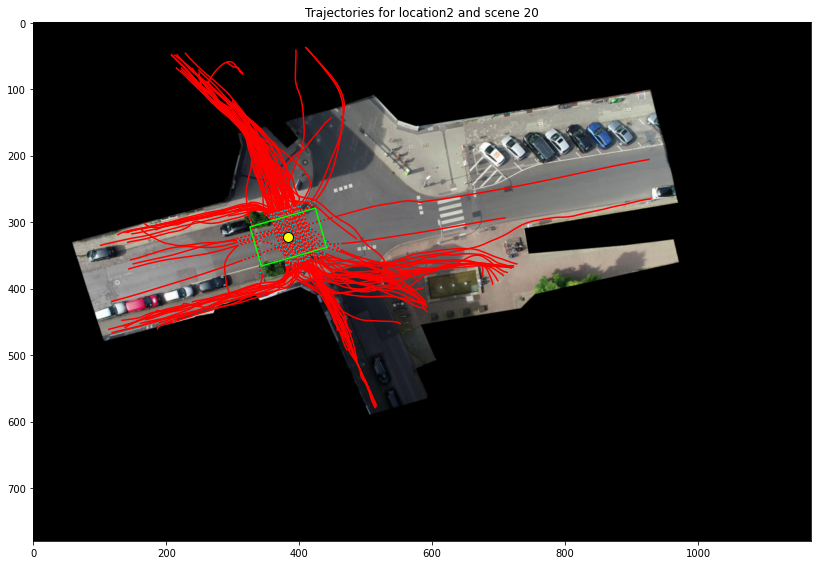

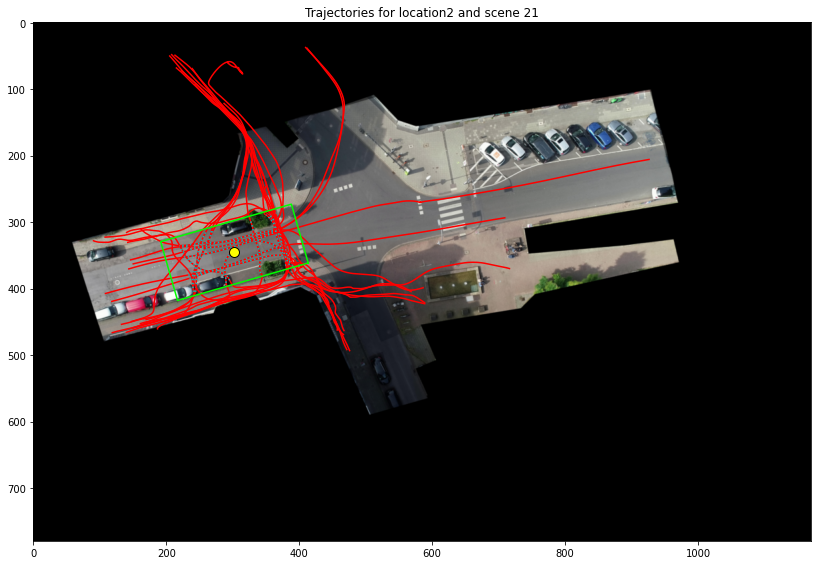

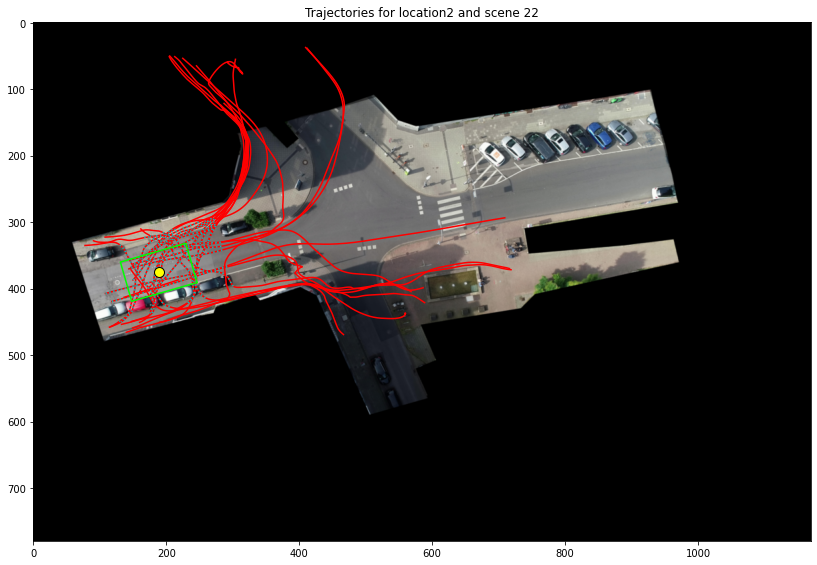

In [17]:
scene20Data = loc2data.getSceneCrossingData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneCrossingData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneCrossingData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

2022-09-27 15:48:45.672 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-27 15:48:45.685 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-27 15:48:45.686 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 169/169 [00:25<00:00,  6.74it/s]
2022-09-27 15:49:15.522 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png
2022-09-27 15:49:26.478 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-27 15:49:26.481 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-27 15:49:26.482 | DEBUG    | extractors.SceneData:_clip:129 - clipp

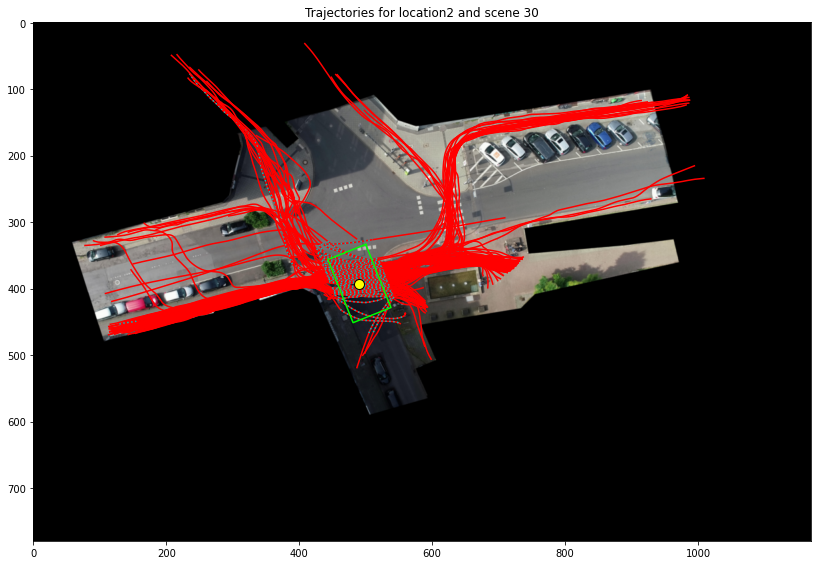

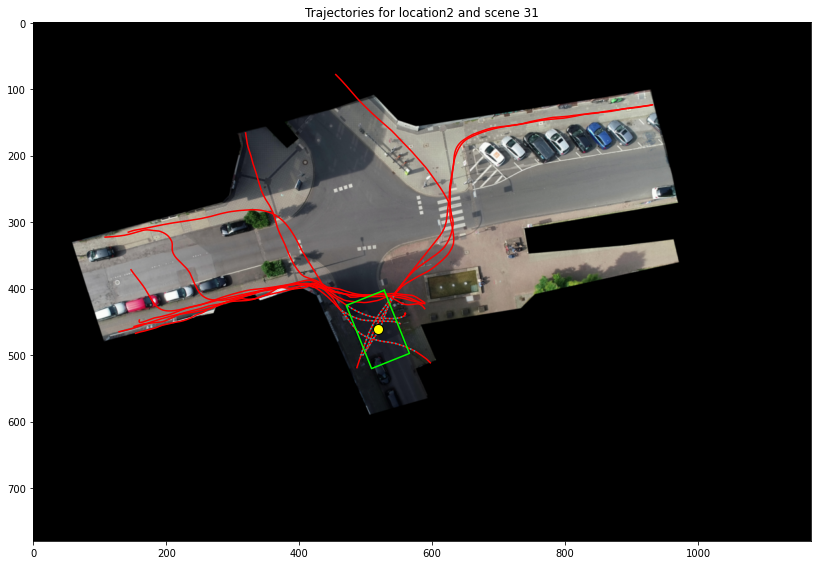

In [18]:
scene30Data = loc2data.getSceneCrossingData(30, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene30Data)

scene31Data = loc2data.getSceneCrossingData(31, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene31Data)

In [19]:
scene40Data = loc2data.getSceneCrossingData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)

KeyError: '4'